<a href="https://colab.research.google.com/github/ghl051/ghl051/blob/main/Final_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Frame

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from lightgbm import LGBMClassifier  # LightGBM Classifier
from xgboost import XGBClassifier  # XGBoost Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier model
from sklearn.svm import SVC  # Support Vector Classifier (SVM) model
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Classifier model

In [2]:
df = pd.read_csv(r'/content/Final_Test.csv')

In [3]:
df.head()

,Customer_id,Credit_score,Country,Gender,Age,Tenure,Balance,Products_number,Credit_card,Active_member,Estimated_salary,Churn
0,15634602,619,France,Female,42,2,0,1,1,1,10134888,1
1,15647311,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,15619304,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,15701354,699,France,Female,39,1,0,2,0,0,9382663,0
4,15737888,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_id       10000 non-null  int64 
 1   Credit_score      10000 non-null  int64 
 2   Country           10000 non-null  object
 3   Gender            10000 non-null  object
 4   Age               10000 non-null  int64 
 5   Tenure            10000 non-null  int64 
 6   Balance           10000 non-null  int64 
 7   Products_number   10000 non-null  int64 
 8   Credit_card       10000 non-null  int64 
 9   Active_member     10000 non-null  int64 
 10  Estimated_salary  10000 non-null  int64 
 11  Churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


### EDA

In [5]:
df.isna().sum()

Customer_id         0
Credit_score        0
Country             0
Gender              0
Age                 0
Tenure              0
Balance             0
Products_number     0
Credit_card         0
Active_member       0
Estimated_salary    0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Customer_id         10000
Credit_score          460
Country                 3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
Products_number         4
Credit_card             2
Active_member           2
Estimated_salary     9999
Churn                   2
dtype: int64

In [8]:
# Drop the columns
df = df.drop(["Customer_id"], axis = 1)

In [9]:
df.head()

,Credit_score,Country,Gender,Age,Tenure,Balance,Products_number,Credit_card,Active_member,Estimated_salary,Churn
0,619,France,Female,42,2,0,1,1,1,10134888,1
1,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,699,France,Female,39,1,0,2,0,0,9382663,0
4,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [10]:
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Credit_score,Age,Tenure,Balance,Products_number,Credit_card,Active_member,Estimated_salary,Churn
Credit_score,1.000000,-0.003965,0.000842,0.006832,0.012238,-0.005458,0.025651,-0.000610,-0.027094
Age,-0.003965,1.000000,-0.009997,0.021754,-0.030680,-0.011721,0.085472,-0.015276,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.016583,0.013444,0.022583,-0.028362,0.005657,-0.014001
Balance,0.006832,0.021754,-0.016583,1.000000,-0.276422,-0.011052,-0.010606,0.006023,0.105839
Products_number,0.012238,-0.030680,0.013444,-0.276422,1.000000,0.003183,0.009612,0.013571,-0.047820
Credit_card,-0.005458,-0.011721,0.022583,-0.011052,0.003183,1.000000,-0.011866,-0.006261,-0.007138
Active_member,0.025651,0.085472,-0.028362,-0.010606,0.009612,-0.011866,1.000000,-0.005612,-0.156128
Estimated_salary,-0.000610,-0.015276,0.005657,0.006023,0.013571,-0.006261,-0.005612,1.000000,0.003151
Churn,-0.027094,0.285323,-0.014001,0.105839,-0.047820,-0.007138,-0.156128,0.003151,1.000000


Handling categorical features

In [12]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = label_encoder.fit_transform(df[column])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Credit_score      10000 non-null  int64
 1   Country           10000 non-null  int64
 2   Gender            10000 non-null  int64
 3   Age               10000 non-null  int64
 4   Tenure            10000 non-null  int64
 5   Balance           10000 non-null  int64
 6   Products_number   10000 non-null  int64
 7   Credit_card       10000 non-null  int64
 8   Active_member     10000 non-null  int64
 9   Estimated_salary  10000 non-null  int64
 10  Churn             10000 non-null  int64
dtypes: int64(11)
memory usage: 859.5 KB


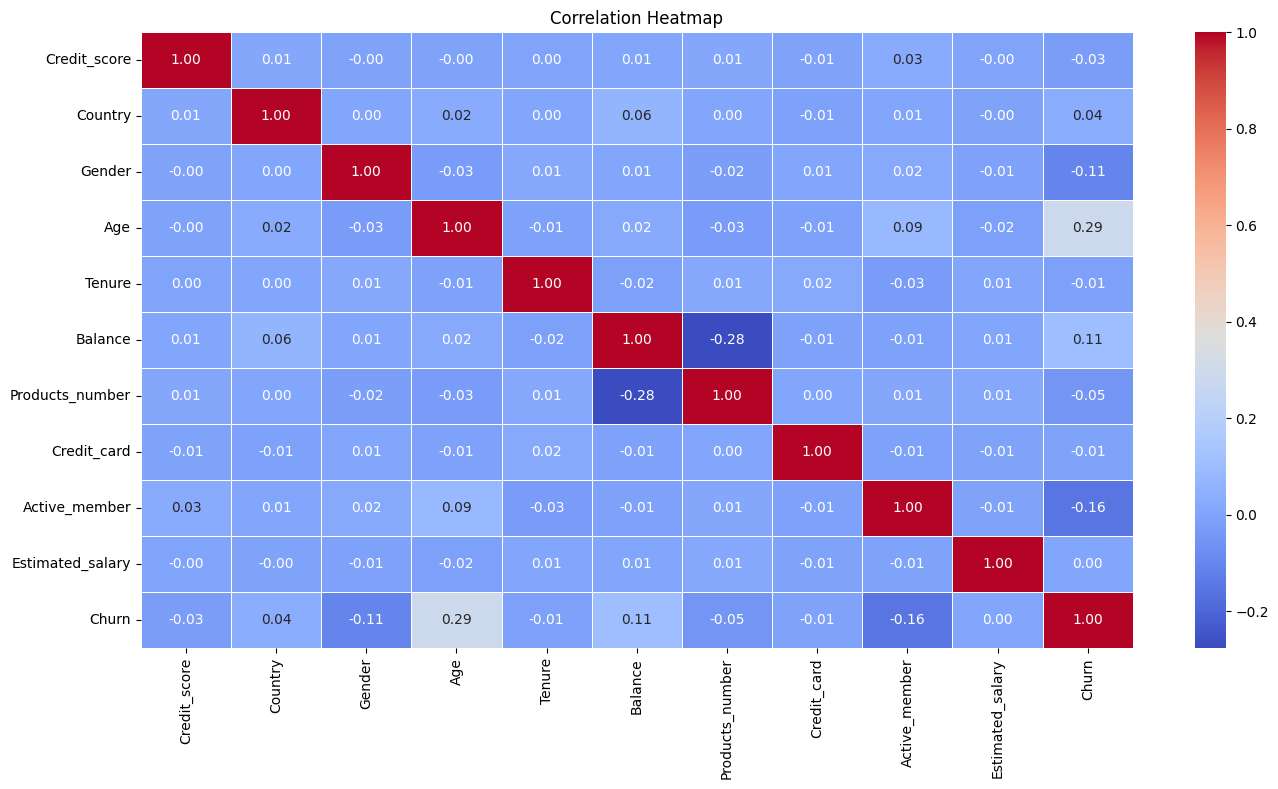

In [14]:
corr_heatmap = df.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Visualization

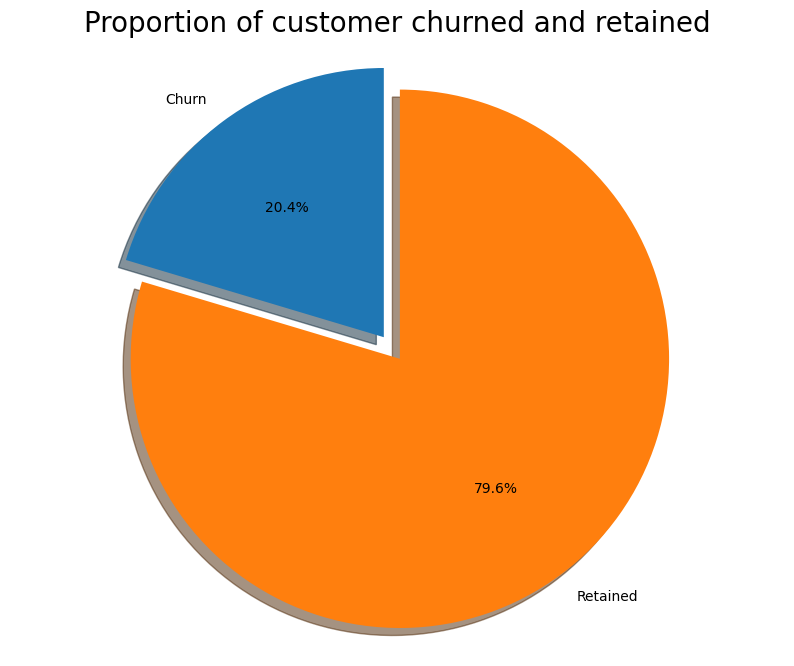

In [15]:
labels = 'Churn', 'Retained'
sizes = [df.Churn[df['Churn']==1].count(), df.Churn[df['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<Axes: xlabel='Active_member', ylabel='count'>

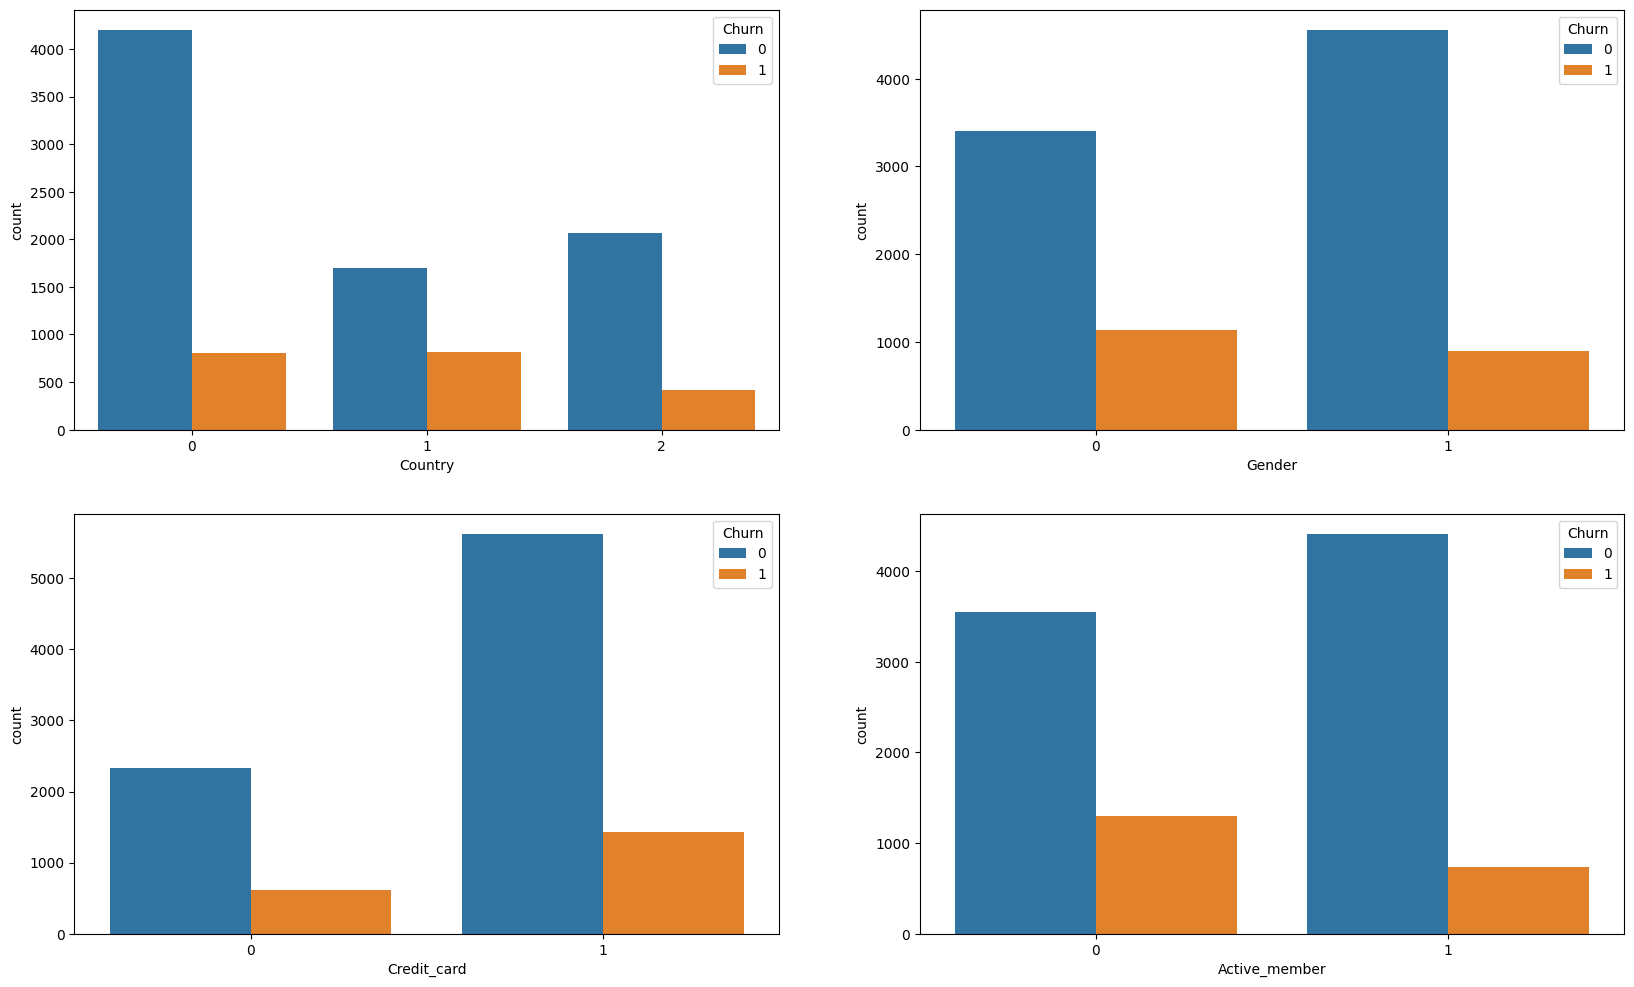

In [16]:
# Relation with caregorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Country', hue = 'Churn',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Churn',data = df, ax=axarr[0][1])
sns.countplot(x='Credit_card', hue = 'Churn',data = df, ax=axarr[1][0])
sns.countplot(x='Active_member', hue = 'Churn',data = df, ax=axarr[1][1])

<Axes: xlabel='Churn', ylabel='Estimated_salary'>

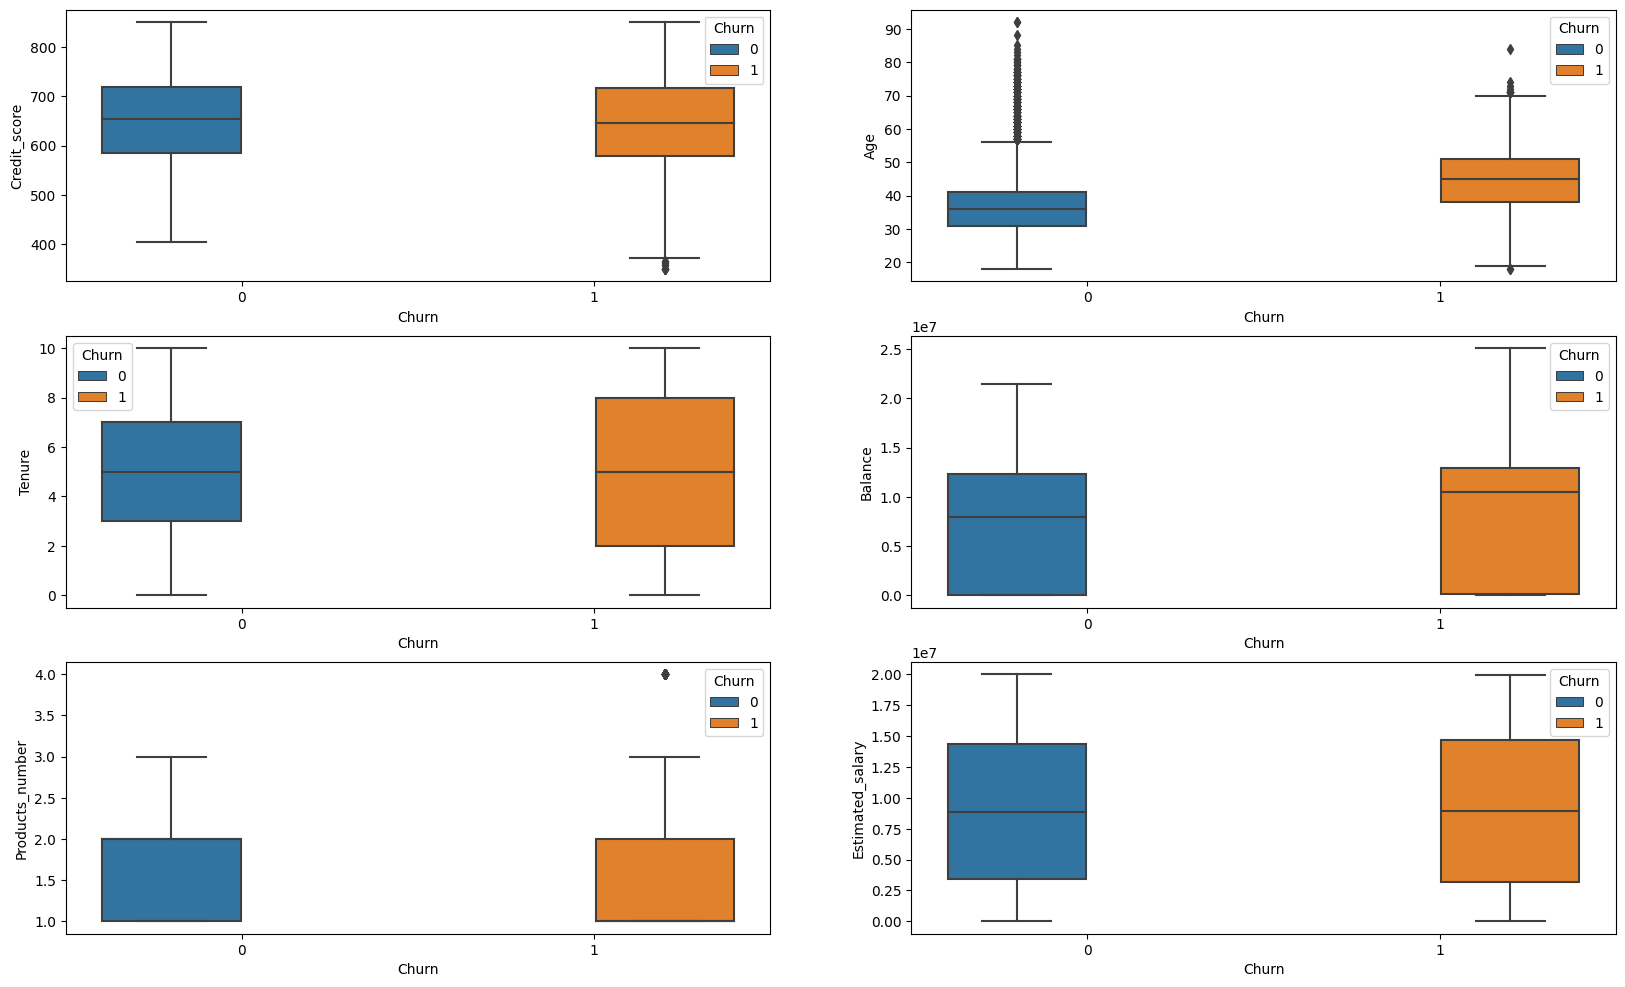

In [17]:
# Data Attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='Credit_score',x = 'Churn', hue = 'Churn',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Churn', hue = 'Churn',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Churn', hue = 'Churn',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Churn', hue = 'Churn',data = df, ax=axarr[1][1])
sns.boxplot(y='Products_number',x = 'Churn', hue = 'Churn',data = df, ax=axarr[2][0])
sns.boxplot(y='Estimated_salary',x = 'Churn', hue = 'Churn',data = df, ax=axarr[2][1])

### Split Train

In [18]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

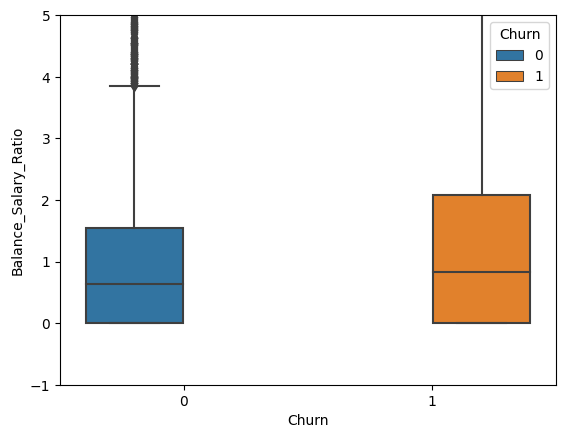

In [19]:
df_train['Balance_Salary_Ratio'] = df_train.Balance/df_train.Estimated_salary
sns.boxplot(y='Balance_Salary_Ratio',x = 'Churn', hue = 'Churn',data = df_train)
plt.ylim(-1, 5)

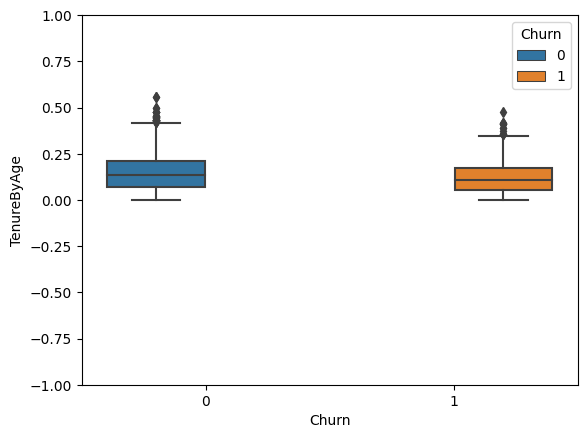

In [20]:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Churn', hue = 'Churn',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [21]:
df_train['CreditScoreGivenByAge'] = df_train.Credit_score/(df_train.Age)

In [22]:
df_train.head()

,Credit_score,Country,Gender,Age,Tenure,Balance,Products_number,Credit_card,Active_member,Estimated_salary,Churn,Balance_Salary_Ratio,TenureByAge,CreditScoreGivenByAge
8159,461,2,0,25,6,0,2,1,1,1530629,0,0.000000,0.240000,18.440000
6332,619,0,0,35,4,9041312,1,1,1,2055521,0,4.398550,0.114286,17.685714
8895,699,0,0,40,8,12203834,1,1,0,10208535,0,1.195454,0.200000,17.475000
5351,558,1,1,41,2,12422714,1,1,1,11118467,0,1.117305,0.048780,13.609756
4314,638,0,1,34,5,13350136,1,0,1,15564304,0,0.857741,0.147059,18.764706


### Model Fitting

In [23]:
# Arrange Columns
continuous_vars = ['Credit_score',  'Age', 'Tenure', 'Balance','Products_number', 'Estimated_salary', 'Balance_Salary_Ratio',
                   'TenureByAge','CreditScoreGivenByAge']
cat_vars = ['Credit_card', 'Active_member','Country', 'Gender']
df_train = df_train[['Churn'] + continuous_vars + cat_vars]
df_train.head()

,Churn,Credit_score,Age,Tenure,Balance,Products_number,Estimated_salary,Balance_Salary_Ratio,TenureByAge,CreditScoreGivenByAge,Credit_card,Active_member,Country,Gender
8159,0,461,25,6,0,2,1530629,0.000000,0.240000,18.440000,1,1,2,0
6332,0,619,35,4,9041312,1,2055521,4.398550,0.114286,17.685714,1,1,0,0
8895,0,699,40,8,12203834,1,10208535,1.195454,0.200000,17.475000,1,0,0,0
5351,0,558,41,2,12422714,1,11118467,1.117305,0.048780,13.609756,1,1,1,1
4314,0,638,34,5,13350136,1,15564304,0.857741,0.147059,18.764706,0,1,0,1


In [24]:
df_train.loc[df_train.Credit_card == 0, 'Credit_card'] = -1
df_train.loc[df_train.Active_member == 0, 'Active_member'] = -1
df_train.head()

,Churn,Credit_score,Age,Tenure,Balance,Products_number,Estimated_salary,Balance_Salary_Ratio,TenureByAge,CreditScoreGivenByAge,Credit_card,Active_member,Country,Gender
8159,0,461,25,6,0,2,1530629,0.000000,0.240000,18.440000,1,1,2,0
6332,0,619,35,4,9041312,1,2055521,4.398550,0.114286,17.685714,1,1,0,0
8895,0,699,40,8,12203834,1,10208535,1.195454,0.200000,17.475000,1,-1,0,0
5351,0,558,41,2,12422714,1,11118467,1.117305,0.048780,13.609756,1,1,1,1
4314,0,638,34,5,13350136,1,15564304,0.857741,0.147059,18.764706,-1,1,0,1


In [36]:
# Encode the categorical variables
lst = ['Country', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

<ipython-input-36-3a7fb34360aa>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
<ipython-input-36-3a7fb34360aa>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):


,Churn,Credit_score,Age,Tenure,Balance,Products_number,Estimated_salary,Balance_Salary_Ratio,TenureByAge,CreditScoreGivenByAge,Credit_card,Active_member,Country,Gender
8159,0,461,25,6,0,2,1530629,0.000000,0.240000,18.440000,1,1,2,0
6332,0,619,35,4,9041312,1,2055521,4.398550,0.114286,17.685714,1,1,0,0
8895,0,699,40,8,12203834,1,10208535,1.195454,0.200000,17.475000,1,-1,0,0
5351,0,558,41,2,12422714,1,11118467,1.117305,0.048780,13.609756,1,1,1,1
4314,0,638,34,5,13350136,1,15564304,0.857741,0.147059,18.764706,-1,1,0,1


In [37]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Churn,Credit_score,Age,Tenure,Balance,Products_number,Estimated_salary,Balance_Salary_Ratio,TenureByAge,CreditScoreGivenByAge,Credit_card,Active_member,Country,Gender
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076510,0.000000,0.432000,0.323157,1,1,2,0
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102756,0.000127,0.205714,0.305211,1,1,0,0
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510433,0.000035,0.360000,0.300198,1,-1,0,0
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555933,0.000032,0.087805,0.208238,1,1,1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778239,0.000025,0.264706,0.330882,-1,1,0,1


In [38]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['Balance_Salary_Ratio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenByAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['Credit_score','Age','Tenure','Balance','Products_number','Estimated_salary','Balance_Salary_Ratio',
                   'TenureByAge','CreditScoreGivenByAge']
    cat_vars = ['Credit_active','Active_member',"Country", "Gender"]
    df_predict = df_predict[['Churn'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.Credit_card == 0, 'Credit_card'] = -1
    df_predict.loc[df_predict.Active_member == 0, 'Active_member'] = -1
    # One hot encode the categorical variables
    lst = ["Country", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

## Modeling

In [39]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [40]:
# Function
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

In [25]:
df.head()

,Credit_score,Country,Gender,Age,Tenure,Balance,Products_number,Credit_card,Active_member,Estimated_salary,Churn
0,619,0,0,42,2,0,1,1,1,10134888,1
1,608,2,0,41,1,8380786,1,0,1,11254258,0
2,502,0,0,42,8,1596608,3,1,0,11393157,1
3,699,0,0,39,1,0,2,0,0,9382663,0
4,850,2,0,43,2,12551082,1,1,1,790841,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop("Churn", axis = 1 )
y = df["Churn"]

In [28]:
# split data into 80% as train data and 20% for testing.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print({"X_train":X_train.shape,"X_test":X_test.shape})
print({"y_train":y_train.shape,"y_test":y_test.shape})

{'X_train': (8000, 10), 'X_test': (2000, 10)}
{'y_train': (8000,), 'y_test': (2000,)}


In [29]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred = rf_clf.predict(X_test)

In [31]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Churn, Length: 2000, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(y_pred,y_test)

In [35]:
accuracy

0.8665

In [41]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(log_primal_Grid)

0.8153750000000001
{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=250, tol=1e-05)


In [42]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Churn'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Churn)
best_model(log_pol2_Grid)

0.8535
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=10, max_iter=300, solver='liblinear')


In [43]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(SVM_grid)

0.8545001829760027
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [ ]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(SVM_grid)

In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(RanFor_grid)

In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(xgb_grid)

### Fit Models

In [ ]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='warn',n_jobs=None,
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)

In [ ]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='warn', n_jobs=None,
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Churn)

In [ ]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)

In [ ]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)

In [ ]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)

### Result

In [ ]:
print(classification_report(df_train.Churn, log_primal.predict(df_train.loc[:, df_train.columns != 'Churn'])))

In [ ]:
print(classification_report(df_train.Churn,  log_pol2.predict(df_train_pol2)))

In [ ]:
print(classification_report(df_train.Churn,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Churn'])))

In [ ]:
print(classification_report(df_train.Churn,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Churn'])))

In [ ]:
print(classification_report(df_train.Churn,  RF.predict(df_train.loc[:, df_train.columns != 'Churn'])))

In [ ]:
print(classification_report(df_train.Churn,  XGB.predict(df_train.loc[:, df_train.columns != 'Churn'])))